# Задание №10. Уравнение теплопроводности.

<div align="right"><i>Бронников Егор ПМ-1901</i></div>

### Импорт модулей

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

%matplotlib inline

### Начальные параметры

In [12]:
L = 1
dX = 0.1
dT = 0.01
l = 0.5
C = 1
p = 0.8
a = np.sqrt(l/(C*p))
m = 10
T0 = 0
T1 = 0

### Уравнение теплопроводности

In [1]:
def heat_equation(L=1, dX=0.1, dT=0.01, l=0.5, C=1, p=0.8, *, m=6, T0=0, T1=0) -> List[List[float]]:
    """ Метод сеток для решения уравнения теплопроводности
        
        :param L: длина стержня
        :type L: float
        :param dX: длина шага по оси X
        :type dX: float
        :param dT: длина шага по оси T
        :type dT: float
        :param l: коэффициент теплопроводности
        :type l: float
        :param C: удельная теплоёмкость
        :type C: float
        :param p: плотность материала стержня
        :type p: float
        :param m: количество кривых (с выбранным шагом dT)
        :type m: int
        :param T0: постоянная температура в начале стержня
        :type T0: float
        :param T1: постоянная температура на конце стержня
        :type T1: float
        
        :return: матрица, в которой показано решение уравнения теплопроводности
        :rtype: List[List[float]]
    """
    n = int(L/dX) + 1
    a = np.sqrt(l/(C*p))
    coef1 = 1-(2*a**2*dT/dX**2)
    coef2 = a**2*dT/dX**2
    u = np.zeros((n,m))
    u[0,:] = T0
    u[n-1,:] = T1
    for x in range(1, n-1):
        u[x,0] = 100*x*dX*(1-x*dX)
    for t in range(1, m):
        for x in range(1, n-1):
            u[x,t] = u[x,t-1]*coef1+coef2*(u[x+1,t-1]+u[x-1,t-1])
    return u

NameError: name 'List' is not defined

In [2]:
heat_equation()[:,0]

NameError: name 'heat_equation' is not defined

In [15]:
heat_equation()[:,1]

array([ 0.  ,  7.75, 14.75, 19.75, 22.75, 23.75, 22.75, 19.75, 14.75,
        7.75,  0.  ])

### Графики

In [6]:
# help(heat_equation)

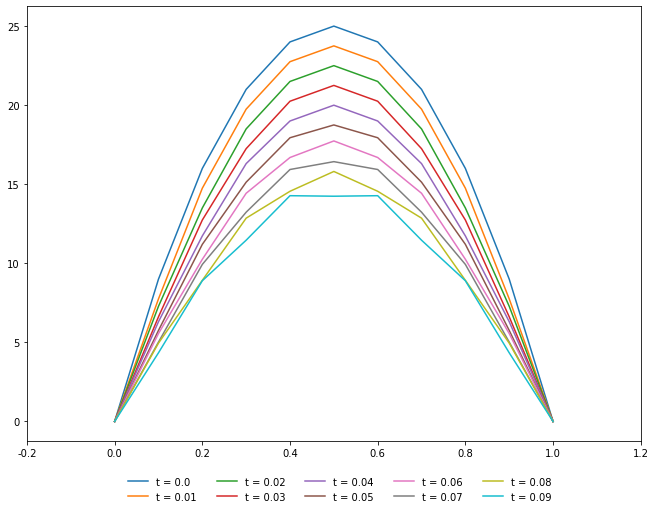

In [22]:
plt.plot(heat_equation(L, dX, dT, l, C, p, m=m, T0=T0, T1=T1))
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
legend = plt.legend([f"t = {i*dT}" for i in range(m)], loc="lower left", ncol=m//2, bbox_to_anchor=(0.15, -0.16))
legend.get_frame().set_linewidth(0.0)
plt.show()

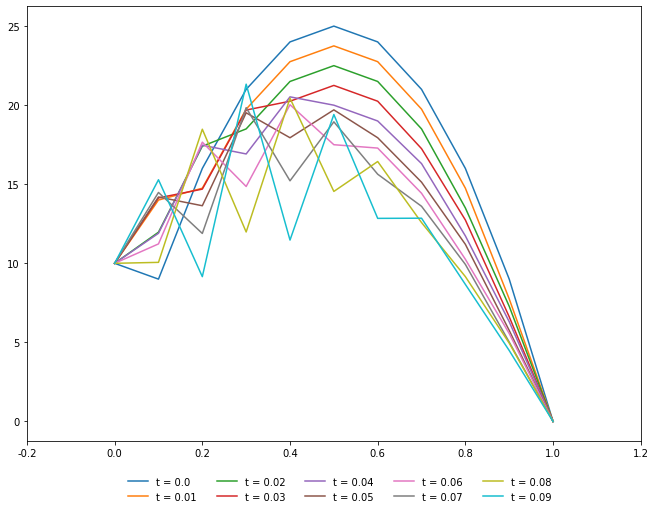

In [25]:
plt.plot(heat_equation(L, dX, dT, l, C, p, m=10, T0=10, T1=T1))
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
legend = plt.legend([f"t = {i*dT}" for i in range(m)], loc="lower left", ncol=m//2, bbox_to_anchor=(0.15, -0.16))
legend.get_frame().set_linewidth(0.0)
plt.show()